In [3]:
from models_v2 import TrajectoryDataset
import random
import torch
import PIL
import matplotlib.pyplot as plt

In [4]:
def flip_augmentation(states, actions):
    """
    Example augmentation function for the TrajectoryDataset.
    Args:
        states (Tensor): Tensor of shape (T, 2, 64, 64).
        actions (Tensor): Tensor of shape (T-1, 2).
    
    Returns:
        Tuple[Tensor, Tensor]: Augmented states and actions.
    """
    if random.random() > 0.5:
        states = torch.flip(states, dims=[-1])  # Flip along the width
        actions[:, 0] = -actions[:, 0]  # Invert x-axis action

    # Random vertical flip
    if random.random() > 0.5:
        states = torch.flip(states, dims=[-2])  # Flip along the height
        actions[:, 1] = -actions[:, 1]  # Invert y-axis action
    return states, actions

In [7]:
dataset = TrajectoryDataset('../data/states.npy', '../data/actions.npy', augmentations=[flip_augmentation])

tensor([[ 0.0510, -0.6727],
        [ 0.1560, -0.5797],
        [ 0.6142, -0.5760],
        [-0.1786, -0.8946],
        [-0.5271, -1.0087],
        [-0.4056, -0.7944],
        [-0.6655, -0.5859],
        [-0.6803, -0.0263],
        [-0.8964,  0.0529],
        [-1.0021, -0.3126],
        [-0.5711, -0.1524],
        [-1.2626,  0.0085],
        [-1.4989,  0.1520],
        [-0.9246,  0.5311],
        [-0.4718,  0.6591],
        [-1.3903,  0.9015]])


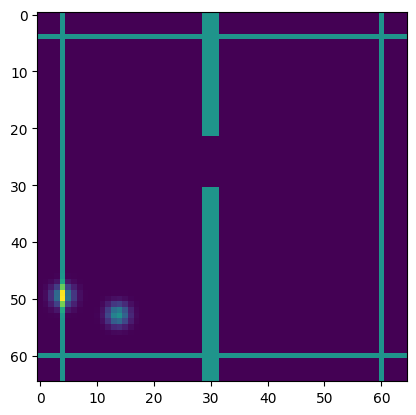

In [15]:
states, actions = dataset[8]  # This will print "augmenting"
start = states[0][0]  # Example indexing to get the tensor
end = states[-1][0]
walls = states[0][1]
plt.imshow(start+end+walls)
print(actions)

tensor([[ 0.0510,  0.6727],
        [ 0.1560,  0.5797],
        [ 0.6142,  0.5760],
        [-0.1786,  0.8946],
        [-0.5271,  1.0087],
        [-0.4056,  0.7944],
        [-0.6655,  0.5859],
        [-0.6803,  0.0263],
        [-0.8964, -0.0529],
        [-1.0021,  0.3126],
        [-0.5711,  0.1524],
        [-1.2626, -0.0085],
        [-1.4989, -0.1520],
        [-0.9246, -0.5311],
        [-0.4718, -0.6591],
        [-1.3903, -0.9015]])


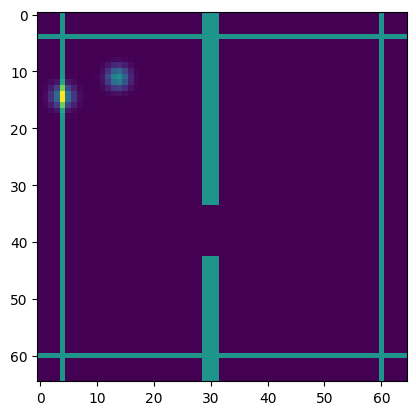

In [17]:
states, actions = dataset[8]  # This will print "augmenting"
start = states[0][0]  # Example indexing to get the tensor
end = states[-1][0]
walls = states[0][1]
plt.imshow(start+end+walls)
print(actions)